In [2]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Step 1: Generate synthetic data for demonstration
np.random.seed(42)
n_samples = 1000

In [4]:
# Atmospheric variables for SCS index
cape = np.random.normal(1500, 500, n_samples)  # Convective Available Potential Energy (J/kg)
shear = np.random.normal(20, 5, n_samples)     # Wind shear (m/s)

In [5]:
# Climatic drivers for attribution
temp = np.random.normal(25, 2, n_samples)      # Surface temperature (°C)
humidity = np.random.normal(70, 10, n_samples) # Relative humidity (%)

In [6]:
# Simulate SCS occurrence (1 = SCS event, 0 = no event)
# Assume higher CAPE and shear increase SCS likelihood
scs_prob = 1 / (1 + np.exp(-(0.001 * cape + 0.1 * shear - 5)))
scs_event = np.random.binomial(1, scs_prob)

In [7]:
# Create DataFrame
data = pd.DataFrame({
    'CAPE': cape,
    'Shear': shear,
    'Temperature': temp,
    'Humidity': humidity,
    'SCS_Event': scs_event
})

In [8]:
# Step 2: Compute SCS Index
# Simple index: Normalize CAPE and Shear, then combine
scaler = StandardScaler()
data[['CAPE_norm', 'Shear_norm']] = scaler.fit_transform(data[['CAPE', 'Shear']])
data['SCS_Index'] = 0.6 * data['CAPE_norm'] + 0.4 * data['Shear_norm']

In [9]:
# Step 3: Attribution Model (Logistic Regression)
# Predict SCS occurrence based on temperature and humidity
X = data[['Temperature', 'Humidity']]
y = data['SCS_Event']
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [10]:
# Get coefficients for attribution
temp_coeff, humidity_coeff = model.coef_[0]
print(f"Attribution Coefficients:\nTemperature: {temp_coeff:.3f}\nHumidity: {humidity_coeff:.3f}")

Attribution Coefficients:
Temperature: 0.046
Humidity: 0.001


/var/folders/hj/4_1_bgn11_dgm99bq0lnjxl80000gn/T/ipykernel_96301/1829694457.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend1 = plt.legend(*scatter.legend_elements(),


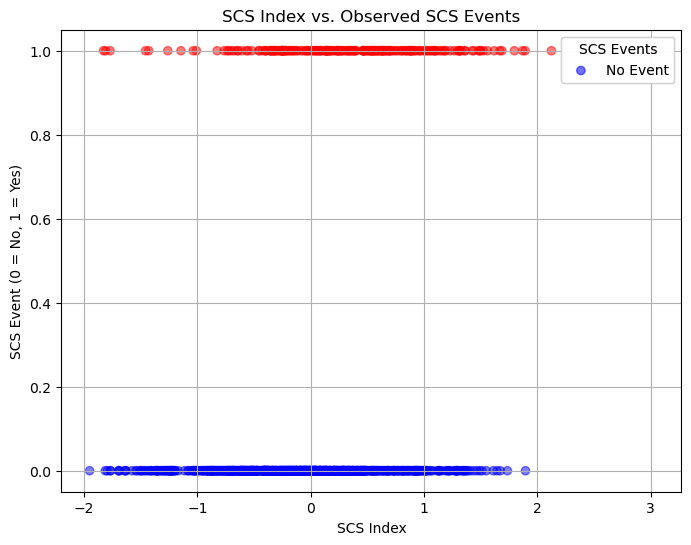

In [16]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['SCS_Index'], data['SCS_Event'], alpha=0.5, c=data['SCS_Event'], cmap='bwr')
plt.xlabel('SCS Index')
plt.ylabel('SCS Event (0 = No, 1 = Yes)')
plt.title('SCS Index vs. Observed SCS Events')
plt.grid(True)
# Add legend
legend1 = plt.legend(*scatter.legend_elements(),
                    title="SCS Events",
                    labels=["No Event", "Event"],
                    loc="upper right")
plt.gca().add_artist(legend1)
plt.show()
#plt.savefig('scs_index_plot.png')
plt.close()

In [12]:
# Step 5: Save SCS Index to CSV
data[['CAPE', 'Shear', 'SCS_Index', 'SCS_Event']].to_csv('scs_index_data.csv', index=False)